# Ph Recognition

## Implementation of Decision Trees

In [55]:
#import libraries
#This is list of all libraries that use in my projects. Note that I dont necessarily use all of them in every project

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import statistics
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

import warnings
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, balanced_accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

## Data Preparation and Visualization

In [2]:
data = pd.read_csv("ph.csv")

In [3]:
data.head()

,blue,green,red,ph
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [4]:
data.dtypes

blue     int64
green    int64
red      int64
ph       int64
dtype: object

In [5]:
data.isna().sum()

blue     0
green    0
red      0
ph       0
dtype: int64

In [6]:
len(data)

653

<IPython.core.display.Javascript object>


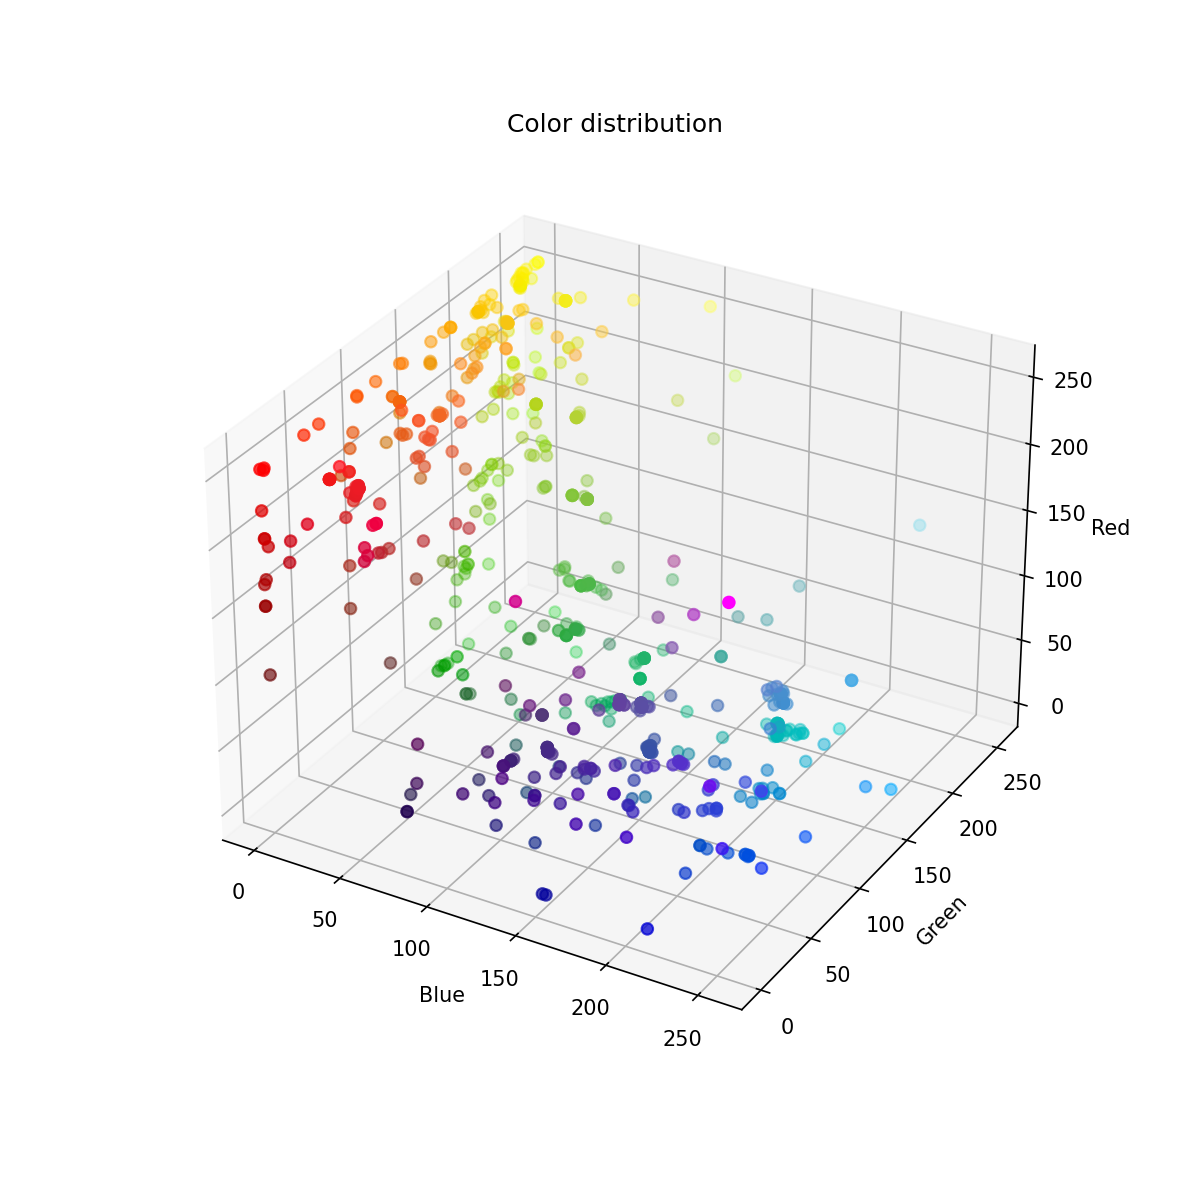

In [7]:
colors = np.array([data.red, data.green, data.blue]).T
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = data.blue
y = data.green
z = data.red
ax.scatter(x, y, z, c=colors/255.0, s=30)
ax.set_title("Color distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()

In [11]:
def determine_acidity(data):
    if data['ph'] == 7:
        val = 'neutral'
    elif data['ph'] > 7:
        val = 'base'
    elif data['ph'] < 7:
        val = 'acid'
    return val

In [12]:
data['result'] = data.apply(determine_acidity, axis=1)

In [13]:
data.head()

,blue,green,red,ph,result
0,36,27,231,0,acid
1,36,84,250,1,acid
2,37,164,255,2,acid
3,22,205,255,3,acid
4,38,223,221,4,acid


In [14]:
data.groupby("result").mean()

,blue,green,red,ph
result,,,,
acid,26.662252,150.970199,198.711921,3.059603
base,157.511401,103.270358,53.530945,10.993485
neutral,43.159091,173.977273,53.250000,7.000000


<IPython.core.display.Javascript object>


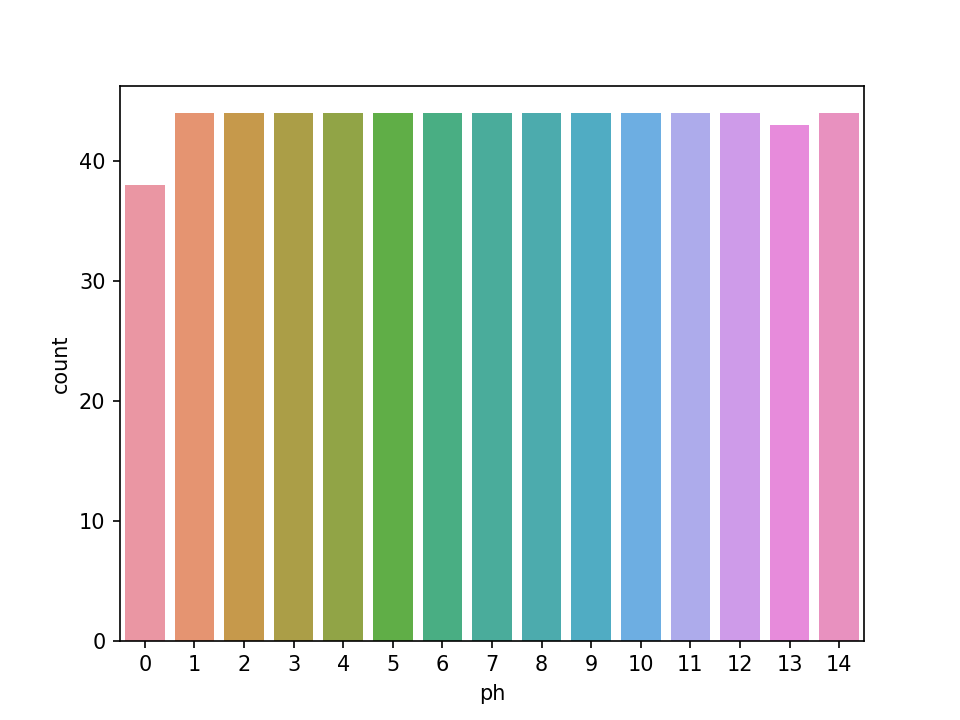

In [15]:
plt.figure()
sb.countplot(x='ph', data=data)
plt.show()

<IPython.core.display.Javascript object>


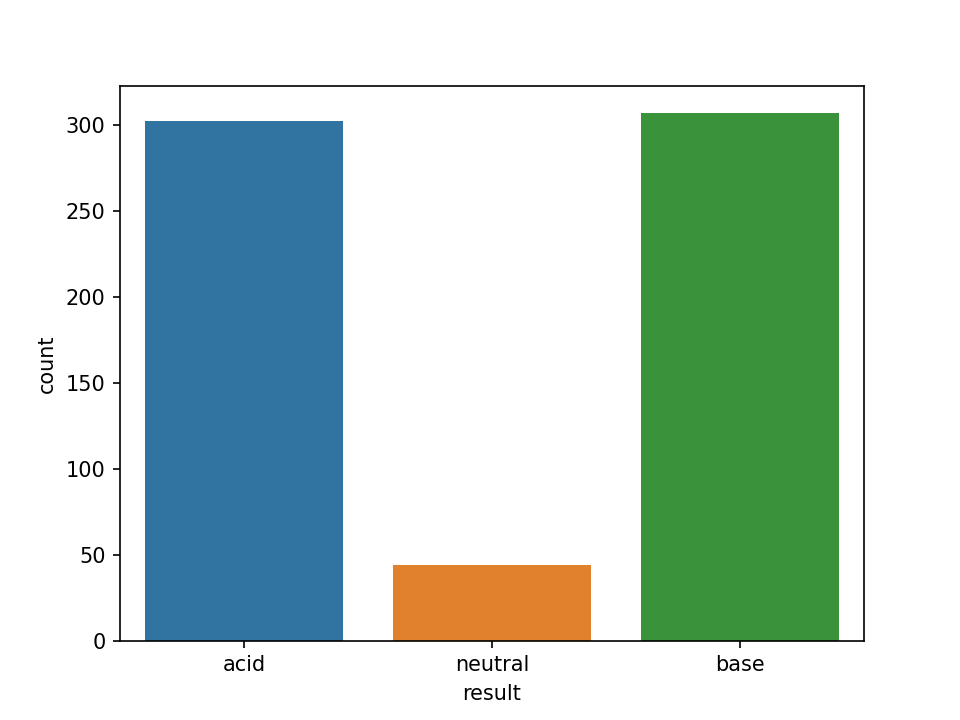

In [16]:
plt.figure()
sb.countplot(x='result', data=data)
plt.show()

<IPython.core.display.Javascript object>


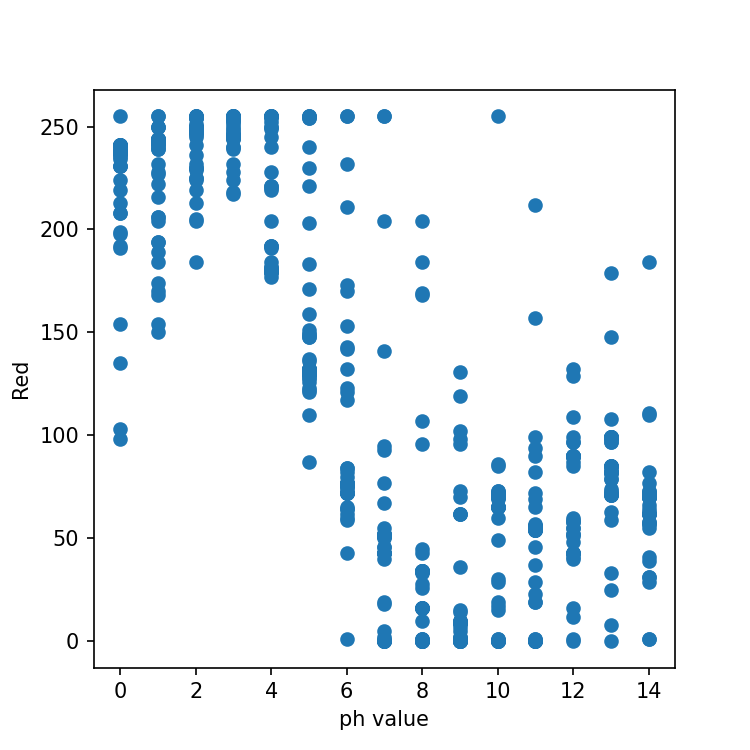

<IPython.core.display.Javascript object>


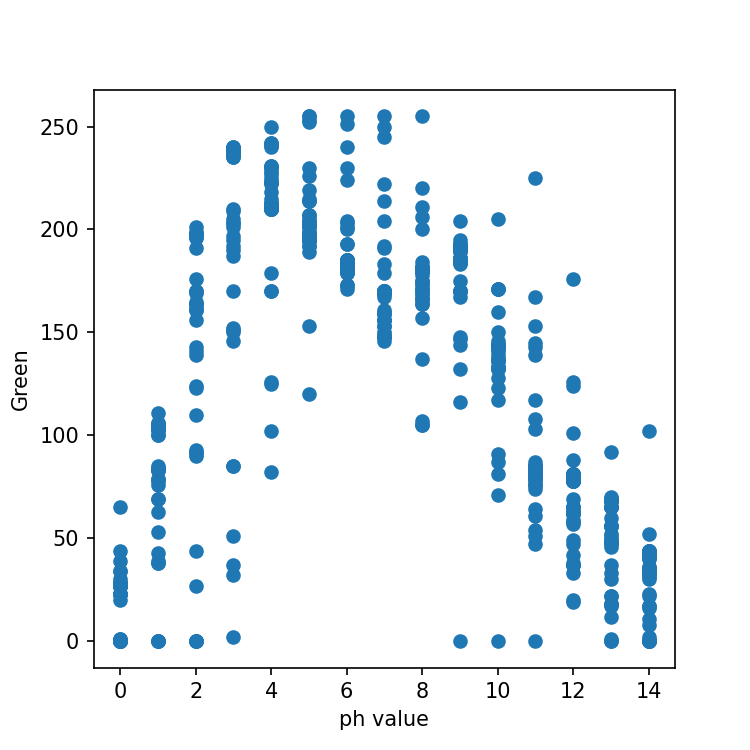

<IPython.core.display.Javascript object>


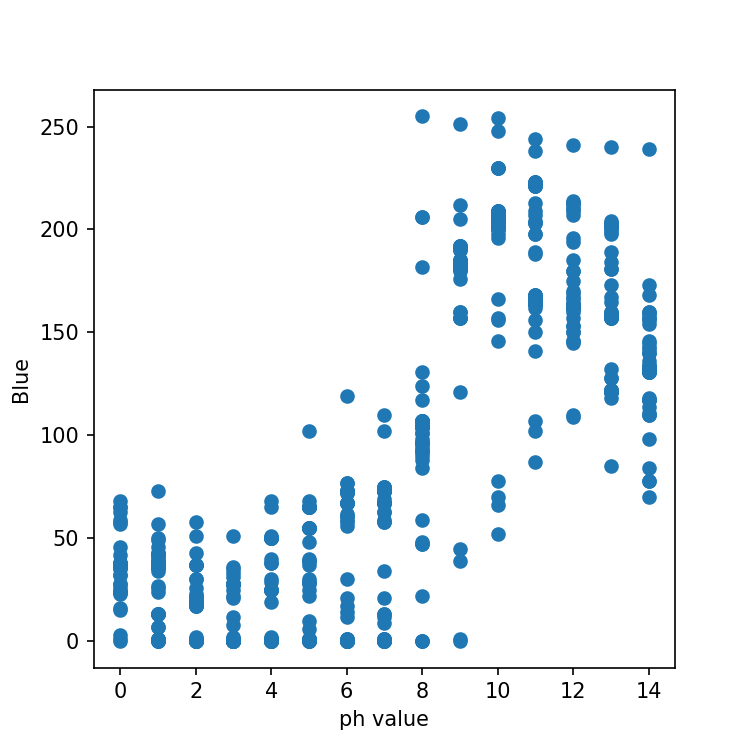

In [17]:
plt.figure(figsize=(5,5))

plt.scatter(data['ph'], data['red'])
plt.xlabel('ph value')
plt.ylabel('Red')
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(data['ph'],data['green'])
plt.xlabel('ph value')
plt.ylabel('Green')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(data['ph'], data['blue'])
plt.xlabel('ph value')
plt.ylabel('Blue')
plt.show()

<IPython.core.display.Javascript object>


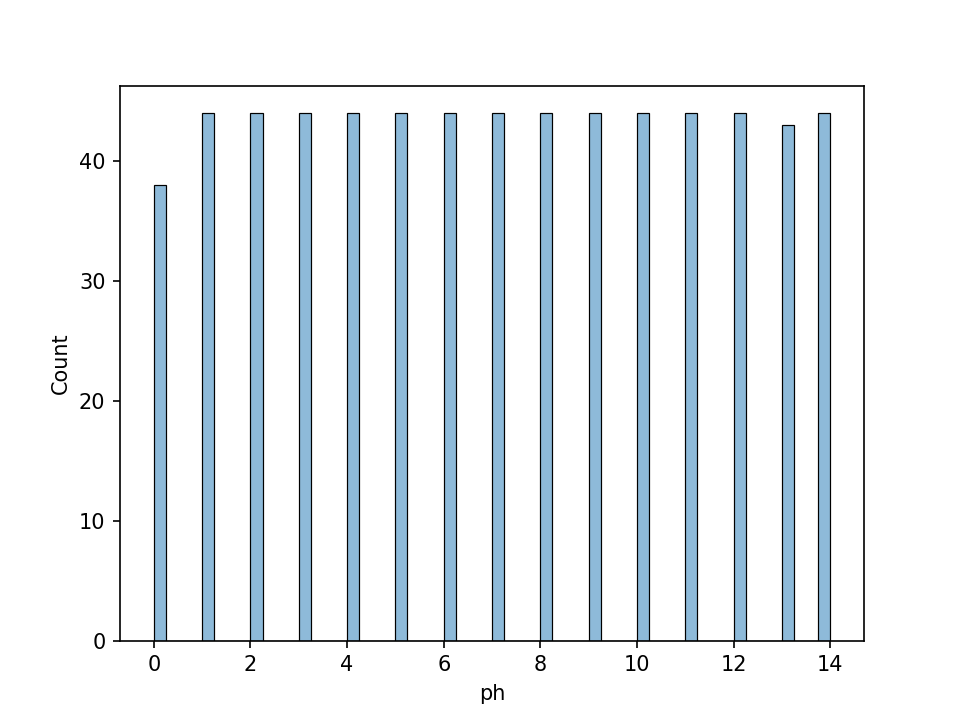

In [18]:
plt.figure()
sb.histplot(data['ph'], bins=56, alpha=.5)
plt.show()

In [19]:
#we will apply regression models on Ph column and classification models on results column:

## Regression

In [20]:
X = data[["blue", "green", "red"]]
y = data["ph"]
feature_names = X.columns

In [21]:
#linear regression

In [22]:
r_range = list(range(1, 31))
r_scores = []
for r in r_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=r)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    scores = r2_score(y_test, y_pred)
    r_scores.append(scores)

max(r_scores)

0.7264711783468873

In [23]:
#Decision tree

In [26]:
r_range = list(range(1, 31))
r_scores = []
for r in r_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=r)
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores = r2_score(y_test, y_pred)
    r_scores.append(scores)
    
max(r_scores)

0.9549967162371205

In [27]:
#plotting a decision tree:

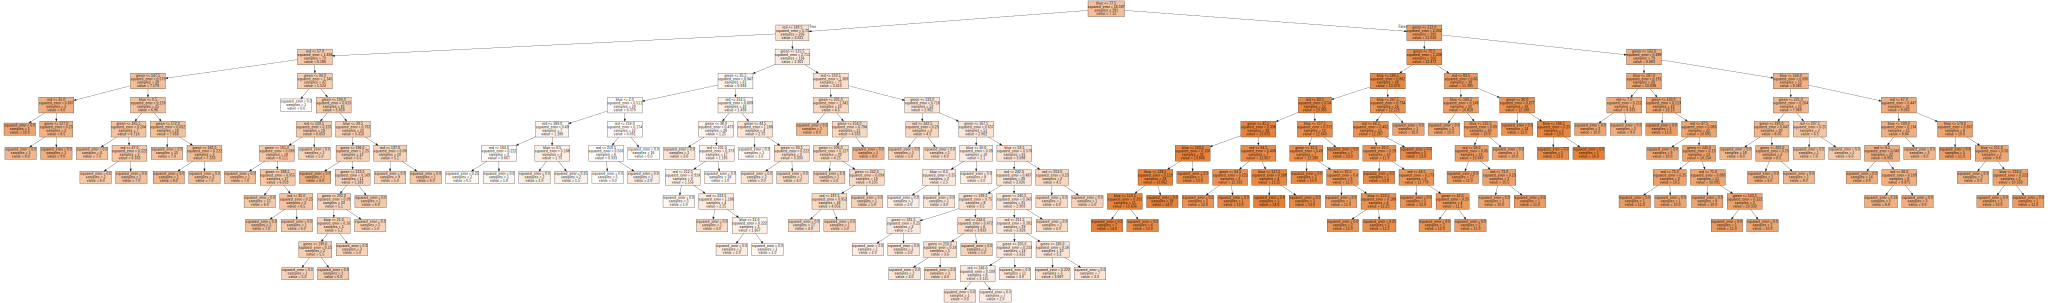

In [28]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=feature_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [29]:
#randomforest

In [30]:
r_range = list(range(1, 31))
r_scores = []
for r in r_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=r)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores = r2_score(y_test, y_pred)
    r_scores.append(scores)
    
pd.DataFrame(r_scores, columns = ["Score"]).sort_values(by=["Score"], ascending=False)

,Score
19,0.973736
23,0.971957
8,0.964963
16,0.962227
22,0.961782
14,0.961735
20,0.959609
11,0.958693
1,0.957253
17,0.956242


In [31]:
# best model = RanForest
# evaluating the model:
list(zip(rf.feature_importances_, X))

[(0.7460003533597594, 'blue'),
 (0.14043544111442158, 'green'),
 (0.11356420552581895, 'red')]

In [32]:
feature_importance = pd.DataFrame(list(zip(rf.feature_importances_, X)), columns = ["Score","Color"])
feature_importance

,Score,Color
0,0.746000,blue
1,0.140435,green
2,0.113564,red


## Classification

In [33]:
X = data[["blue", "green", "red"]]
y = data["result"]

In [34]:
#logreg

In [35]:
r_range = list(range(1, 31))
r_scores = []
for r in r_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=r)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    r_scores.append(scores)

max(r_scores)

0.9618320610687023

In [36]:
#KNN

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
max(scores)

0.9807692307692307

In [38]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier()
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.953916,0.046154,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.953916,0.046154,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.952378,0.043250,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.956993,0.043943,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.953893,0.051501,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.952354,0.053064,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.950839,0.042895,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.950816,0.054971,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.956993,0.045561,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.953893,0.051501,"{'n_neighbors': 5, 'weights': 'distance'}"


In [39]:
#RanForest

In [40]:
r_range = list(range(1, 31))
r_scores = []
for r in r_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=r)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    r_scores.append(scores)
    
max(r_scores)

0.9847328244274809

In [41]:
#DecisionTree

In [42]:
r_range = list(range(1, 31))
r_scores = []
for r in r_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=r)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    r_scores.append(scores)
    
pd.DataFrame(r_scores, columns = ["Score"]).sort_values(by=["Score"], ascending=False)

,Score
19,0.969466
11,0.969466
6,0.961832
8,0.961832
10,0.961832
16,0.961832
23,0.958015
14,0.958015
15,0.954198
1,0.950382


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9732824427480916

In [44]:
y_prob = dt.predict_proba(X_test)
y_prob

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. 

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121   2   2]
 [  1 126   0]
 [  2   0   8]]


<IPython.core.display.Javascript object>


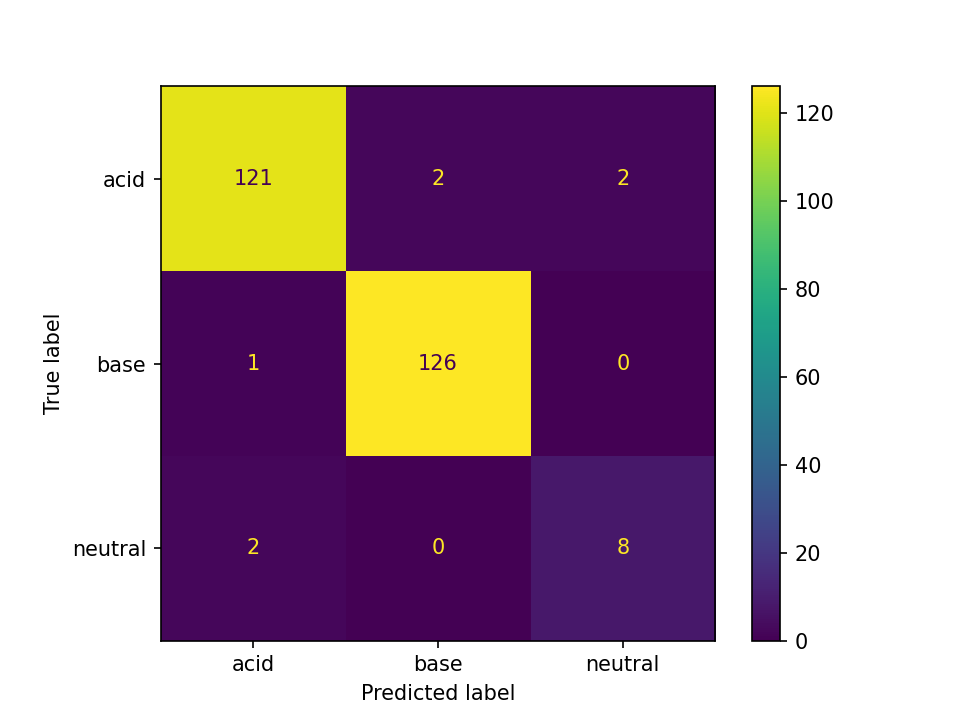

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

In [47]:
data["result"].replace(("acid", "base", "neutral"), (-1, 1, 0), inplace=True)

<IPython.core.display.Javascript object>


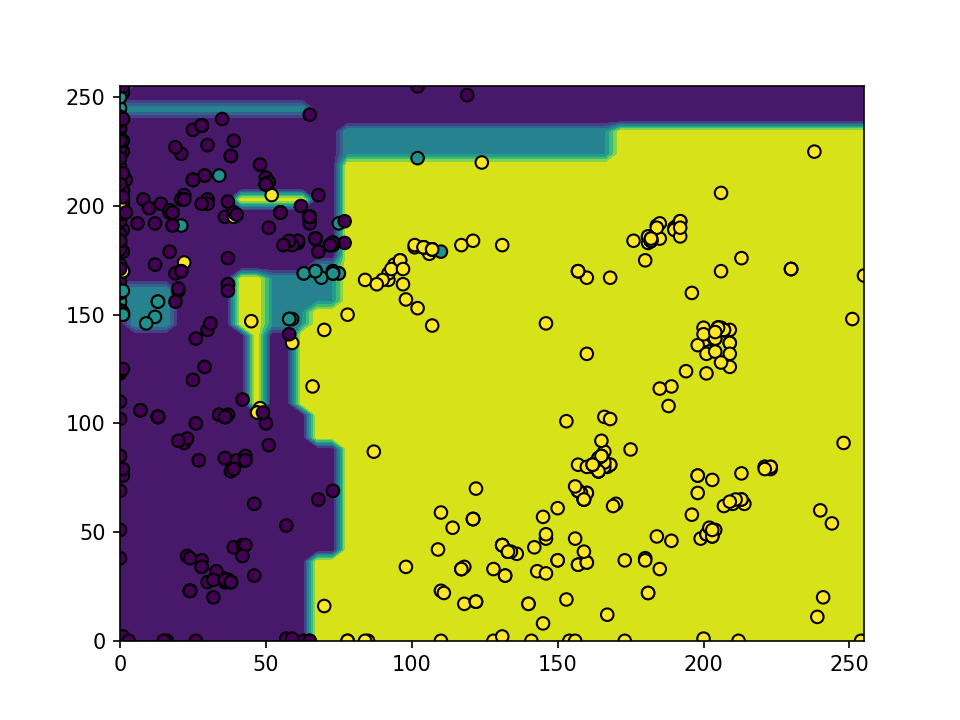

In [48]:
feature_1, feature_2 = np.meshgrid(
     np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
     np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max())
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(data.iloc[:, :2], data.result)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)

display.plot()

display.ax_.scatter(
    data.iloc[:, 0], data.iloc[:, 1], c=data.result, edgecolor="black"
)

plt.show()


## Hyper-parameter tuning

In [49]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [50]:
grid_search = GridSearchCV(dt, 
                           param_grid=params, 
                           cv=4 , scoring = "accuracy")

In [51]:
%%time
grid_search.fit(X_train, y_train)

CPU times: total: 1.12 s
Wall time: 1.75 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [52]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002493,0.002122,0.004976,0.002139,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.938776,0.959184,0.908163,0.917526,0.930912,0.019735,22
1,0.002461,0.001885,0.004455,0.003028,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.948980,0.959184,0.918367,0.917526,0.936014,0.018427,4
2,0.000000,0.000000,0.008003,0.000080,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.948980,0.959184,0.918367,0.917526,0.936014,0.018427,4
3,0.000000,0.000000,0.008019,0.000029,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918367,0.887755,0.846939,0.855670,0.877183,0.028220,31
4,0.005930,0.006503,0.000000,0.000000,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.887755,0.887755,0.846939,0.865979,0.872107,0.017035,41
5,0.003922,0.006793,0.003905,0.006764,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.938776,0.959184,0.908163,0.927835,0.933489,0.018449,17
6,0.007957,0.005569,0.000000,0.000000,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.948980,0.938776,0.918367,0.917526,0.930912,0.013461,22
7,0.003909,0.006770,0.002028,0.003513,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.948980,0.959184,0.918367,0.917526,0.936014,0.018427,4
8,0.004654,0.006450,0.003253,0.005634,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.918367,0.887755,0.846939,0.855670,0.877183,0.028220,31
9,0.000798,0.001382,0.003949,0.003693,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.887755,0.887755,0.846939,0.865979,0.872107,0.017035,41


In [53]:
max_score = results.sort_values(by=["mean_test_score"], ascending=False).iloc[0]
pd.DataFrame(max_score)

,15
mean_fit_time,0.005927
std_fit_time,0.006501
mean_score_time,0.0
std_score_time,0.0
param_criterion,gini
param_max_depth,10
param_min_samples_leaf,5
params,"{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
split0_test_score,0.959184
split1_test_score,0.94898


In [54]:
best_score = grid_search.best_estimator_
print(classification_report(y_test, best_score.predict(X_test)))

              precision    recall  f1-score   support

        acid       0.97      0.99      0.98       125
        base       1.00      0.99      1.00       127
     neutral       0.88      0.70      0.78        10

    accuracy                           0.98       262
   macro avg       0.95      0.89      0.92       262
weighted avg       0.98      0.98      0.98       262

